In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

In [5]:
import seaborn as sns
%matplotlib inline

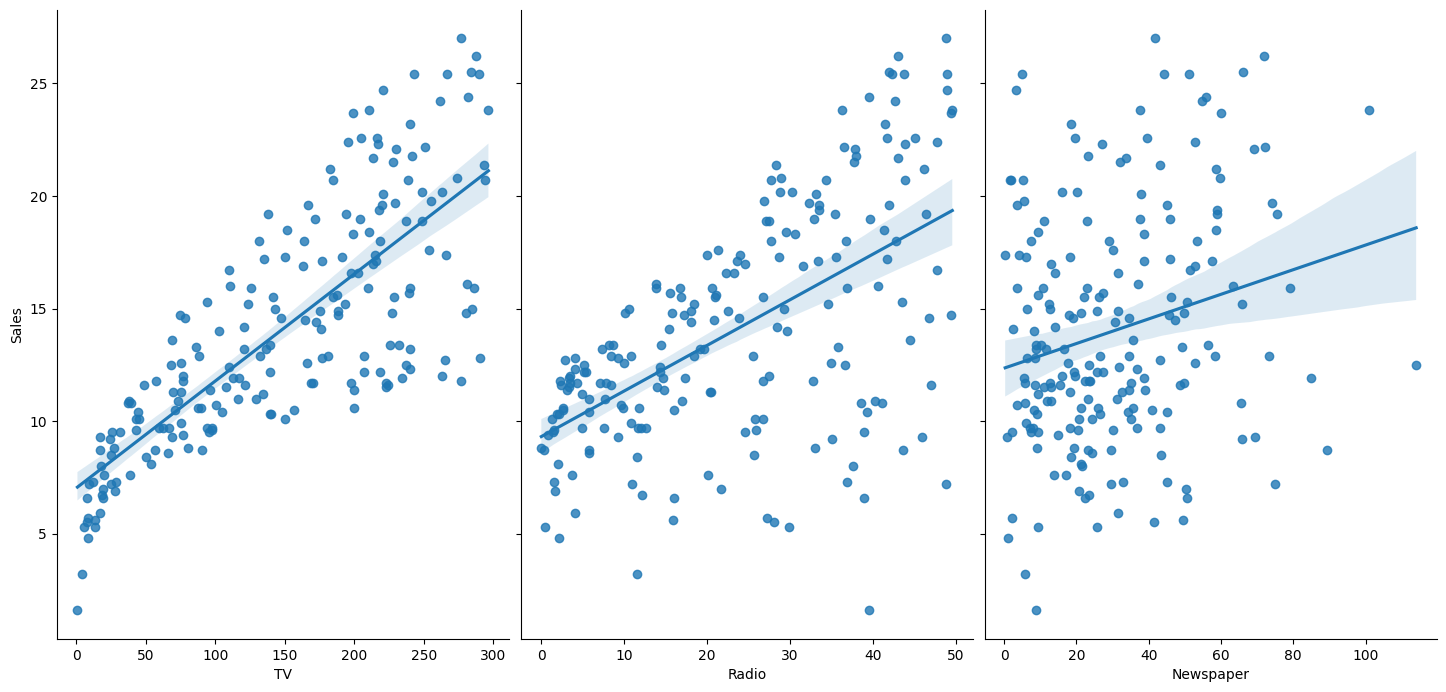

In [6]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [7]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
y = data['Sales']
y = data.Sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [13]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [14]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [15]:
list(zip(feature_cols, linreg.coef_))

[('TV', np.float64(0.046564567874150295)),
 ('Radio', np.float64(0.1791581224508883)),
 ('Newspaper', np.float64(0.0034504647111804065))]

In [16]:
y_pred = linreg.predict(X_test)

In [17]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [18]:
print((10 + 0 + 20 + 10)/4.)
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [19]:
print((10**2 + 0**2 + 20**2 + 10**2)/4.)
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [20]:
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032896


In [22]:
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
